# CM50268 :: Final project

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 03, 2024. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 will be awarded based only on the content of the report.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import hmc_Lab as hmc

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 
 
 -  Please utilize zero-mean normalization on `X_train`and <font color=Red>refrain</font> from applying any normalization technique to obtain `y_train`.
  

In [5]:
#### **** YOUR CODE HERE **** ####  
import seaborn as sns

# Data import

train_data = pd.read_csv('ee-train.csv')
test_data = pd.read_csv('ee-test.csv')

X_train = train_data.iloc[:,0:9].values
y_train = train_data.iloc[:,9:10].values.ravel()

X_test = test_data.iloc[:,0:9].values
y_test = test_data.iloc[:,9:10].values.ravel()
#### **** You can add extra cells to illustrate your results **** ####  

In [6]:
print(train_data.describe().T)

                           count        mean        std     min       25%  \
const                      384.0    1.000000   0.000000    1.00    1.0000   
Relative Compactness       384.0    0.771042   0.106553    0.62    0.6900   
Surface Area               384.0  665.774740  88.196712  514.50  588.0000   
Wall Area                  384.0  318.180990  42.248972  245.00  294.0000   
Roof Area                  384.0  173.796875  44.852410  110.25  140.8750   
Overall Height             384.0    5.377604   1.747619    3.50    3.5000   
Orientation                384.0    3.536458   1.097695    2.00    3.0000   
Glazing Area               384.0    0.236849   0.133306    0.00    0.1000   
Glazing Area Distribution  384.0    2.783854   1.567506    0.00    1.0000   
Heating Load               384.0   22.920703  10.066099    6.40   14.0575   

                               50%       75%     max  
const                        1.000    1.0000    1.00  
Relative Compactness         0.760    0.86

In [7]:
# Standardisation to have mean 0 and std 1

mean = np.mean(X_train[:,1:9], axis=0)
std_dev = np.std(X_train[:,1:9], axis=0)

standardized_data = (X_train[:,1:9] - mean) / std_dev


X_train[:,1:9] = standardized_data

standardized_test_data = (X_test[:,1:9] - mean) / std_dev
X_test[:,1:9] = standardized_test_data

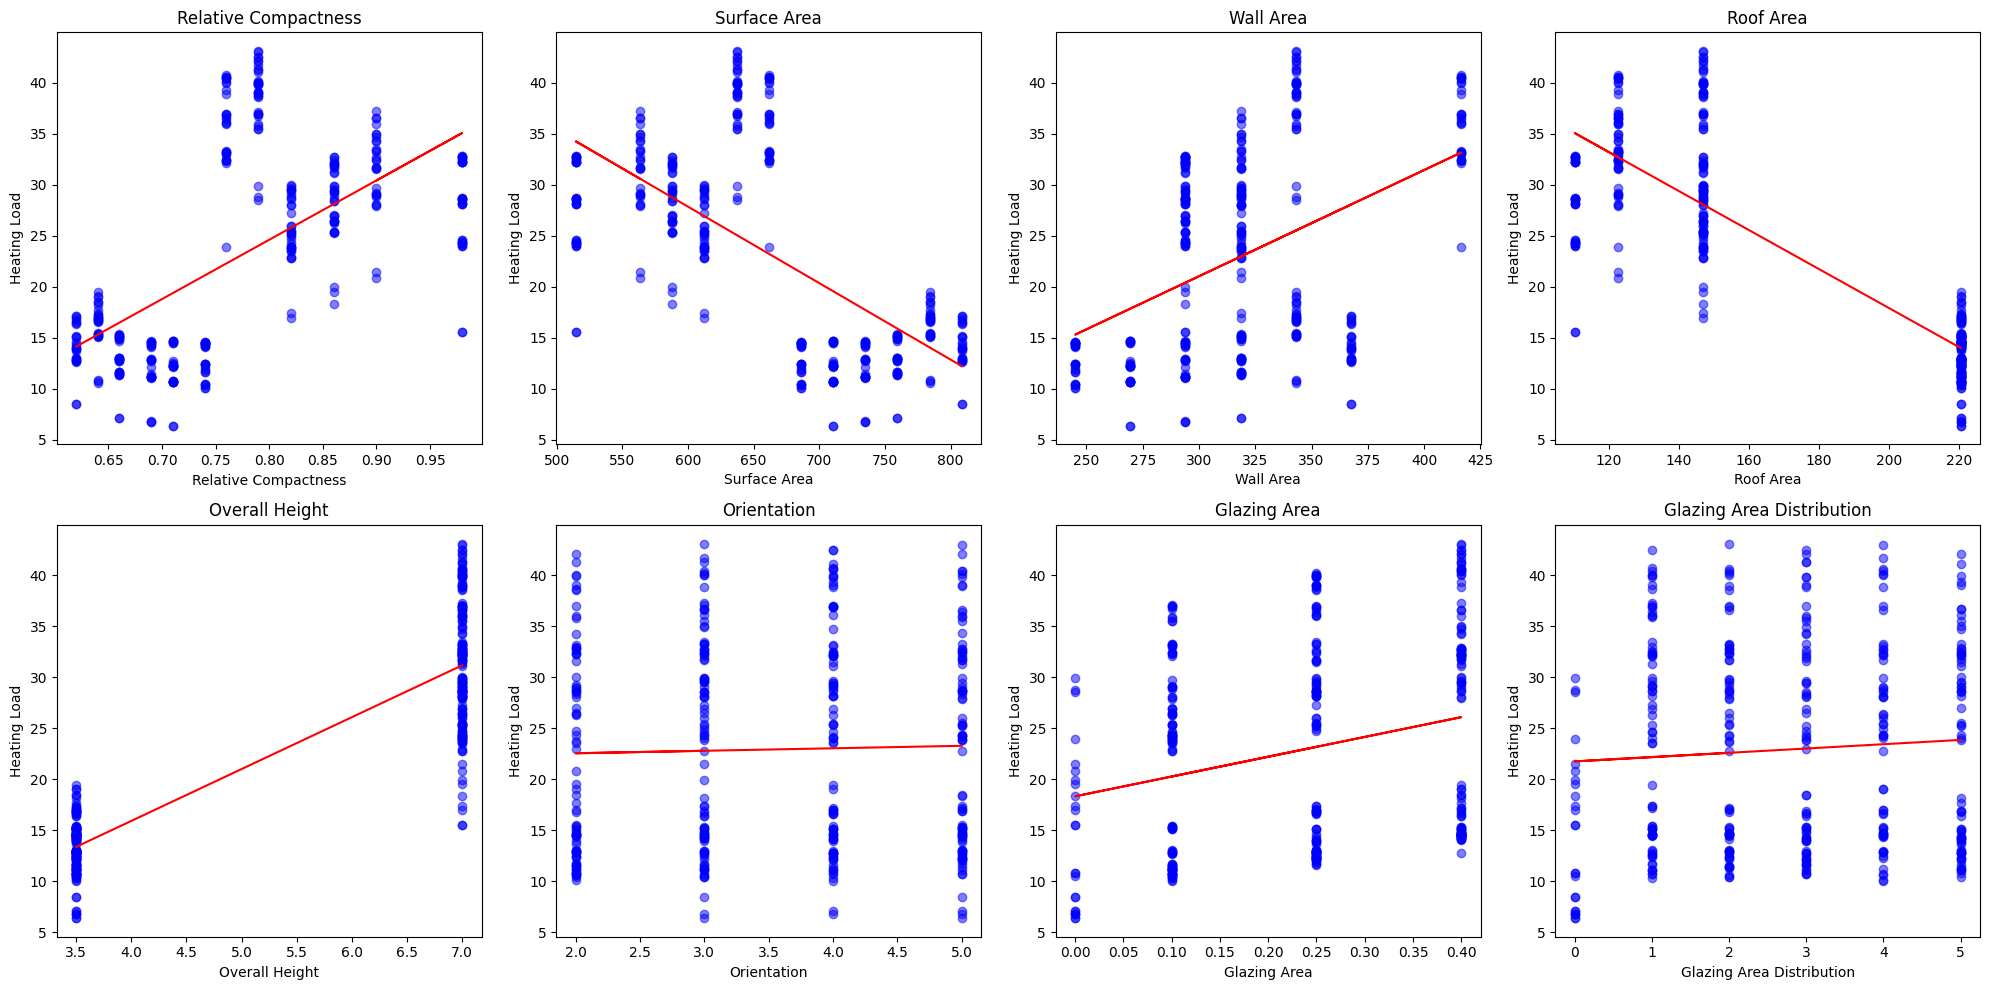

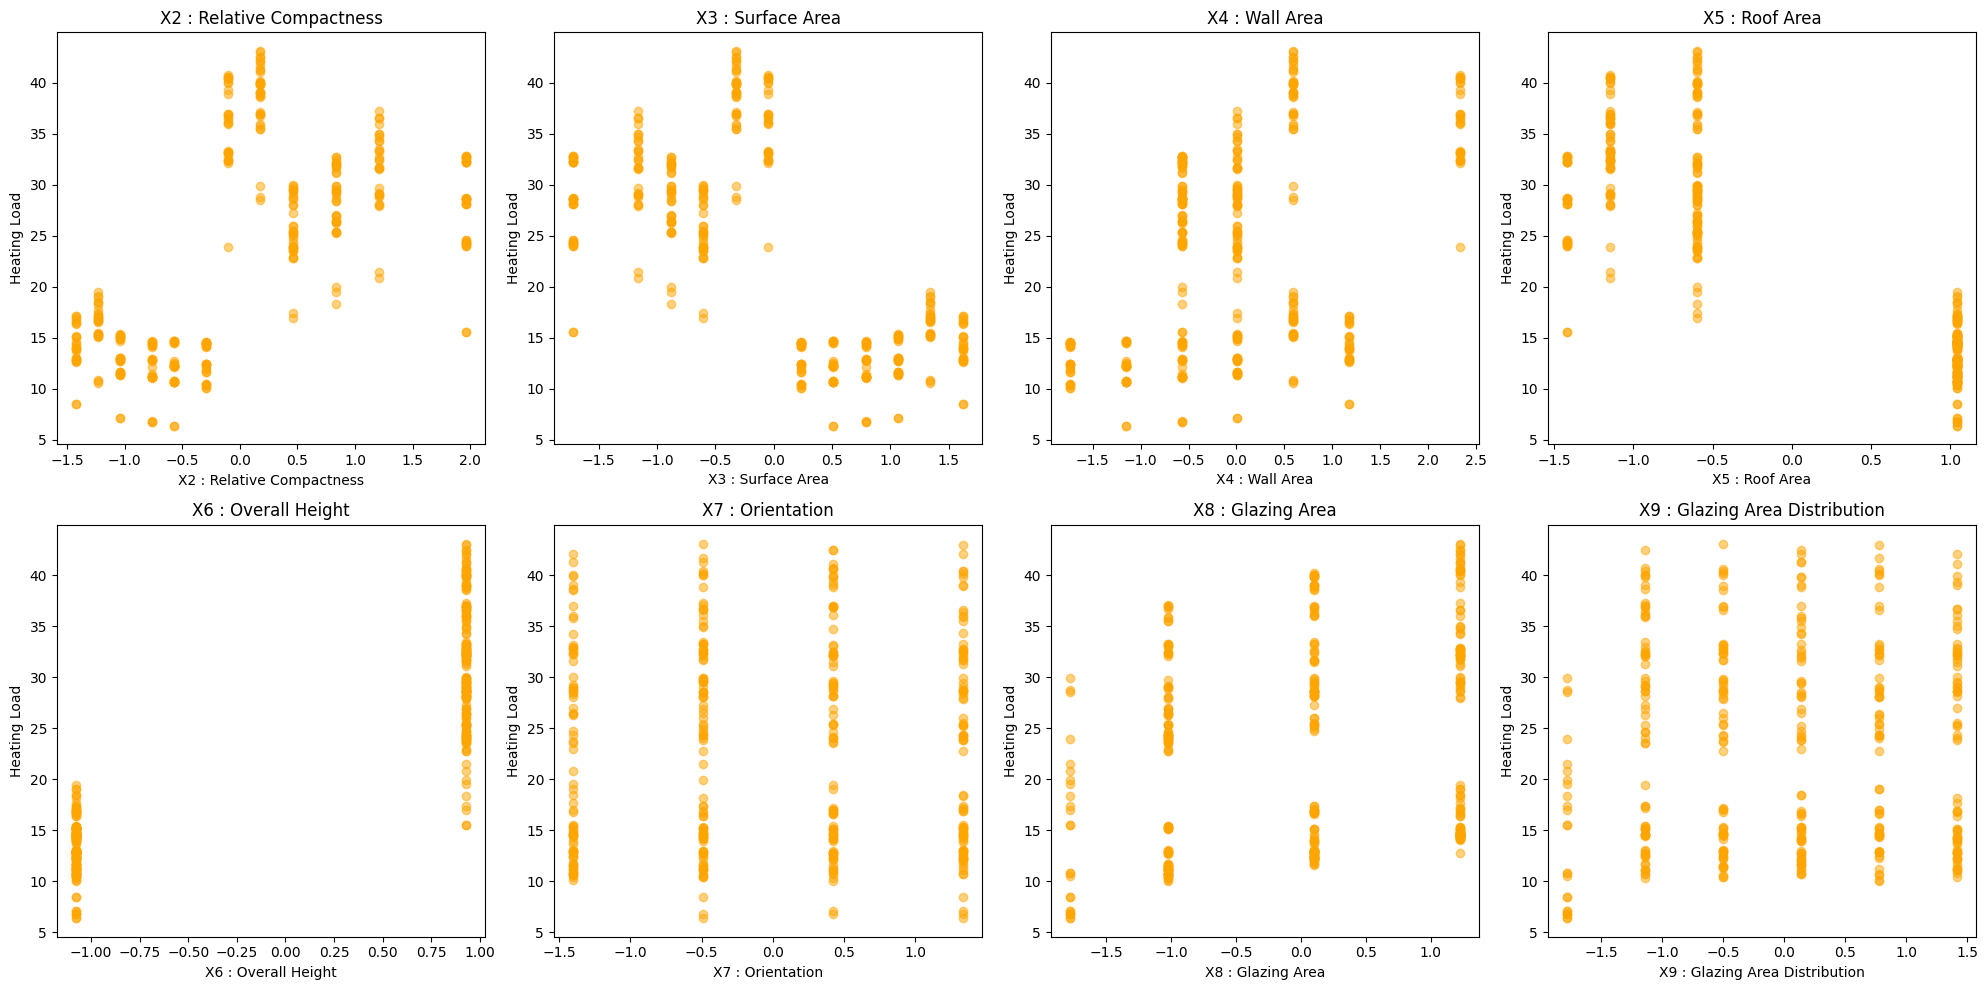

In [8]:
# Scatter plots of input variables against heating load
plt.figure(figsize=(20, 10))
for i in range(1, 9):
    plt.subplot(2, 4, i)
    x = train_data.iloc[:, i]
    y = train_data['Heating Load']
    plt.scatter(train_data.iloc[:, i], train_data['Heating Load'], alpha=0.5, c='blue')
    plt.title(train_data.columns[i])
    plt.xlabel(train_data.columns[i])
    plt.ylabel('Heating Load')

    # Fit a line to the data
    slope, intercept = np.polyfit(x, y, 1)
    plt.plot(x, slope * x + intercept, color='red')

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
for i in range(1,9):
    plt.subplot(2, 4, i)
    plt.scatter(X_train[:, i], y_train, alpha=0.5, c='orange')
    plt.title(f'X{i+1} : {train_data.columns[i]}')
    plt.xlabel(f'X{i+1} : {train_data.columns[i]}')
    plt.ylabel('Heating Load')

plt.tight_layout()
plt.show()

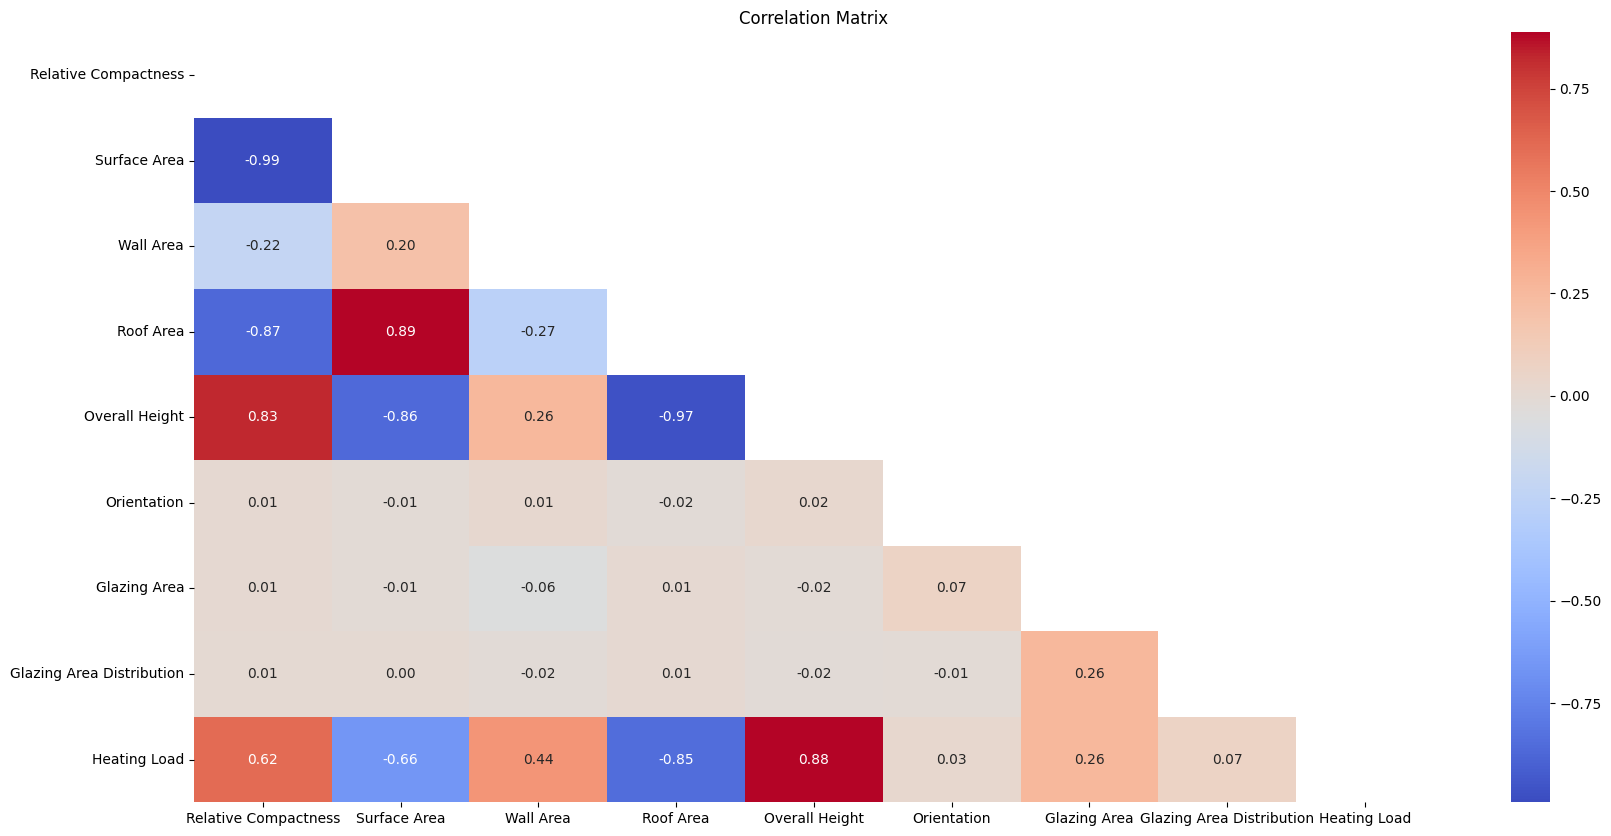

In [9]:
# Correlation matrix
corr_matrix = train_data[train_data.columns[1:]].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, mask= mask, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

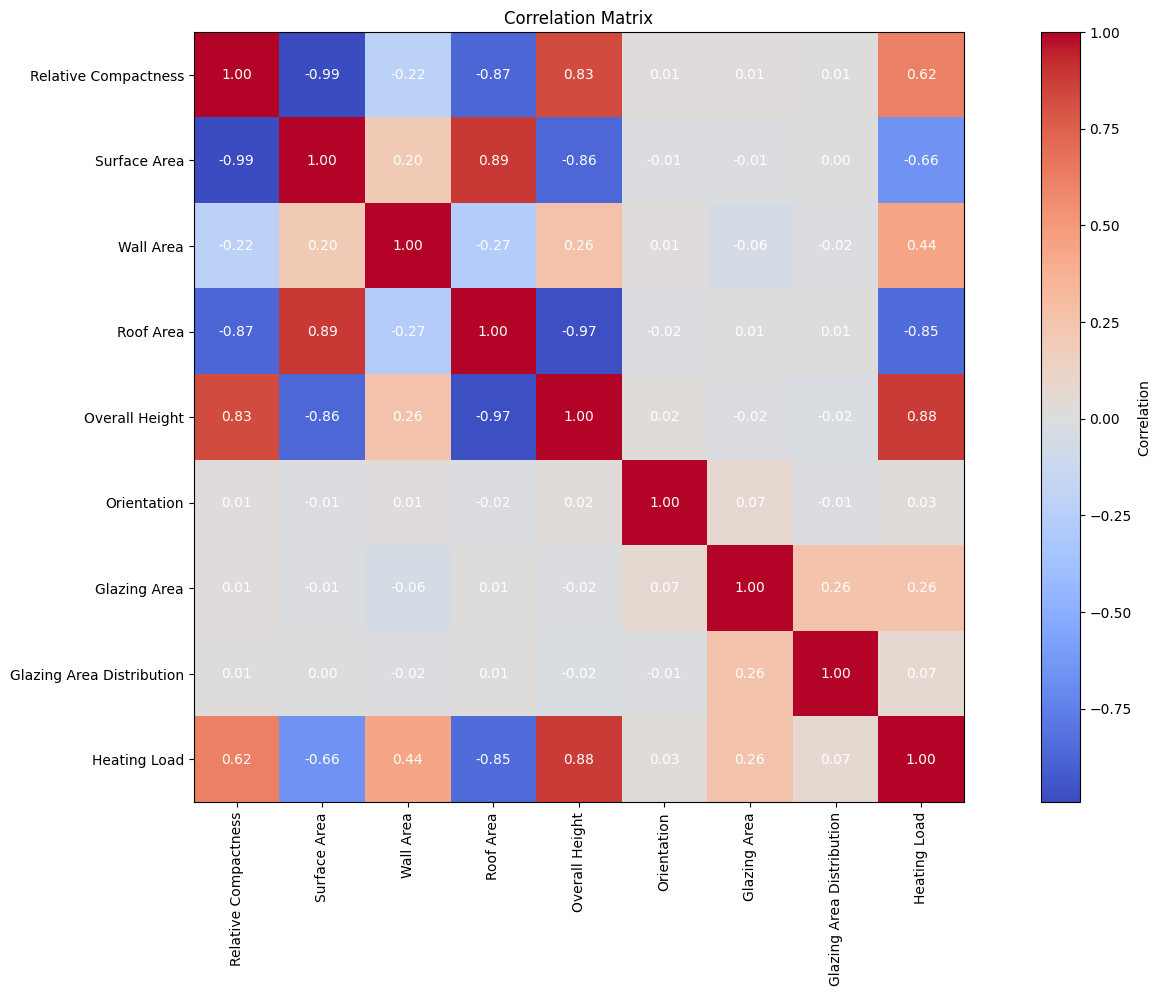

In [10]:
X_with_y_train = np.column_stack((X_train[:, 1:], y_train))

corr_matrix = np.corrcoef(X_with_y_train.T)

plt.figure(figsize=(20, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')

# Adding correlation coefficient values inside pixels
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j, i, '{:.2f}'.format(corr_matrix[i, j]), ha='center', va='center', color='white')

plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(np.arange(9), train_data.columns[1:10], rotation=90)
plt.yticks(np.arange(9), train_data.columns[1:10])

plt.show()


In [11]:
def weights(X_train, y_train, lam):

    if lam == 0:   
        w = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
    else:
        I = np.eye(X_train.shape[1])
        w = np.dot(np.linalg.inv(np.dot(X_train.T,X_train) + lam*I), np.dot(X_train.T, y_train))
    
    return w

def baseline(X_test, X_train, y_train,lam):
    
    w = weights(X_train, y_train, lam)

    prediction = np.dot(X_test, w)

    return prediction

# Prediction
y_test_predicted = baseline(X_test, X_train, y_train, 20)
y_train_predicted = baseline(X_train, X_train, y_train, 20)


# MAE calculation
from sklearn.metrics import mean_absolute_error

mae_test = mean_absolute_error(y_test, y_test_predicted)
mae_train = mean_absolute_error(y_train, y_train_predicted)

print('test_mae: ',mae_test, 'train_mae',mae_train)

test_mae:  2.304374358523759 train_mae 2.4208157233744565


In [12]:
from sklearn.metrics import r2_score
# Calculate R-squared
r2_train = r2_score(y_train, y_train_predicted)
r2_test = r2_score(y_test, y_test_predicted)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

Training R-squared: 0.887377214834669
Testing R-squared: 0.9017479786127385


In [13]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
    if y_train.mean()<10:
        print('Do not apply any normalization technique to obtain `y_train`')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 in the specification doc)

###  **(6 marks for coding part)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters.


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [14]:
## Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####   
    
    N, M = X.shape

    beta = 1/(beta)
    C = beta * np.eye(N) + X @ X.T / alph

    logML = -N/2 * np.log(2*np.pi)

    _, log_det = np.linalg.slogdet(C)

    logML -= log_det / 2

    logML -= y.T @ np.linalg.inv(C) @ y / 2

    return logML


Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms, <font color=Red> which is different from the previous coursework Part2</font>.

In [15]:
#### **** YOUR CODE HERE **** ####   
log_alpha_values = np.linspace(-5, 0, 100)
log_beta_values = np.linspace(-5, 0, 100)


alpha_values = np.exp(log_alpha_values)
beta_values = np.exp(log_beta_values)


log_prob_y = np.zeros((len(log_beta_values), len(log_alpha_values)))
prob_y = np.zeros((len(log_beta_values), len(log_alpha_values)))


for i, beta in enumerate(beta_values):
    for j, alpha in enumerate(alpha_values):
        likelihood = compute_log_marginal(X_train, y_train, alpha, beta)
        log_prob_y[i, j] = likelihood
        prob_y[i, j] = np.exp(likelihood)

# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [16]:
#### **** YOUR CODE HERE **** ####
max_log_prob = np.max(log_prob_y)
max_log_prob_index = np.unravel_index(np.argmax(log_prob_y, axis=None), log_prob_y.shape)
most_probable_log_alpha = log_alpha_values[max_log_prob_index[1]]
most_probable_log_beta = log_beta_values[max_log_prob_index[0]]
most_probable_alpha = np.exp(most_probable_log_alpha)
most_probable_beta = np.exp(most_probable_log_beta)

print("Maximum Log Probability:", max_log_prob)
print("Maximum Probability", np.exp(max_log_prob))
print("Corresponding Alpha (log):", most_probable_log_alpha)
print("Corresponding Beta (log):", most_probable_log_beta)
print("Corresponding Alpha:", most_probable_alpha)
print("Corresponding Beta:", most_probable_beta)

Maximum Log Probability: -1001.4576252255235
Maximum Probability 0.0
Corresponding Alpha (log): -4.444444444444445
Corresponding Beta (log): -2.2222222222222223
Corresponding Alpha: 0.01174362845702136
Corresponding Beta: 0.10836802322189586


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

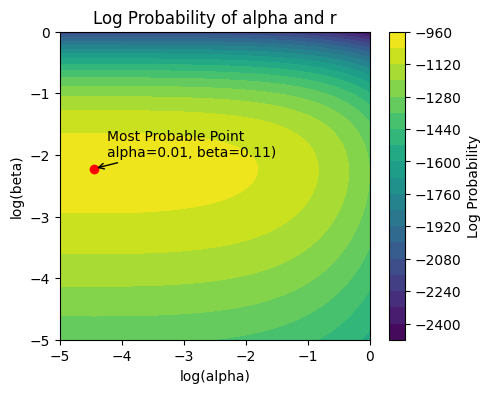

In [17]:
#### **** YOUR CODE HERE **** ####   
plt.figure(figsize=(5, 4))
plt.contourf(log_alpha_values, log_beta_values,  log_prob_y, levels=20)
plt.colorbar(label='Log Probability')
plt.scatter(most_probable_log_alpha, most_probable_log_beta, color='red', marker='o', label='Most Probable Point')
plt.annotate('Most Probable Point\nalpha={:.2f}, beta={:.2f})'.format(np.exp(most_probable_log_alpha), np.exp(most_probable_log_beta)), 
             xy=(most_probable_log_alpha, most_probable_log_beta), 
             xytext=(most_probable_log_alpha + 0.2, most_probable_log_beta + 0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             )
plt.xlabel('log(alpha)')
plt.ylabel('log(beta)')
plt.title('Log Probability of alpha and r')
plt.show()

Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [18]:
def compute_posterior(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####
    beta = 1/beta
    I = np.eye(X.shape[1])
    Mu = np.dot(np.linalg.inv(np.dot(X.T,X) + alph*beta*I), np.dot(X.T, y))
    SIGMA =  beta*np.linalg.inv(np.dot(X.T,X) + beta*alph*I)
    
    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [19]:
#### **** YOUR CODE HERE **** ####
Mu, SIGMA= compute_posterior(X_train, y_train, most_probable_log_alpha, most_probable_log_beta)

y_post_train = np.dot(X_train, Mu)
y_post_test = np.dot(X_test, Mu)

from sklearn.metrics import mean_squared_error

rmse_test = np.sqrt(mean_squared_error(y_test, y_post_test))
rmse_train = np.sqrt(mean_squared_error(y_train, y_post_train))

print("RSME Train:", rmse_train, '\nRSME Test:', rmse_test)

RSME Train: 3.027325283841385 
RSME Test: 2.857319656209279


# Task 3: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks for coding part)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [20]:
def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    mvn = stats.multivariate_normal(mean=np.zeros_like(x), cov=covar)
    log_pdf = mvn.logpdf(x)
    neglgp = -log_pdf
    return neglgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    g = np.dot(np.linalg.inv(covar), x)
    
    return g



## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

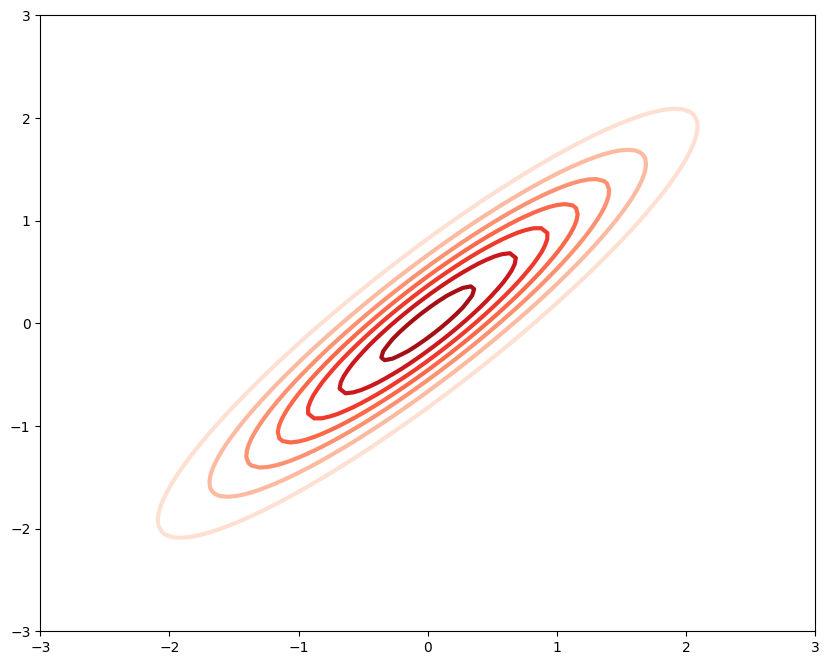

In [21]:

#### **** YOUR CODE BELOW **** ####

#covar = np.array([[1,0.9],[0.9,1]]) 
covar = np.array([[1.0875, 1], [1, 1.0875]])  
#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1)

In [22]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [23]:
# Initialise the state for the first time step
np.random.seed(seed=1)
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
     13.0203       13.0203   1.234408e-09  11
    -12.5352      -12.5352   1.540879e-09  10


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
     13.0203       13.0203   1.234408e-09  11
    -12.5352      -12.5352   1.540879e-09  10
|----------|  0% accepted [ 11 secs to go ]
|#---------| 92% accepted [ 10 secs to go ]
|##--------| 91% accepted [ 9 secs to go ]
|###-------| 92% accepted [ 8 secs to go ]
|####------| 91% accepted [ 7 secs to go ]
|#####-----| 91% accepted [ 6 secs to go ]
|######----| 91% accepted [ 5 secs to go ]
|#######---| 91% accepted [ 3 secs to go ]
|########--| 91% accepted [ 2 secs to go ]
|#########-| 91% accepted [ 1 secs to go ]
|##########| 91% accepted [ 0 secs to go ]
HMC: R=7000 / L=20 / eps=0.35 / Accept=90.9%


Text(0, 0.5, 'x2')

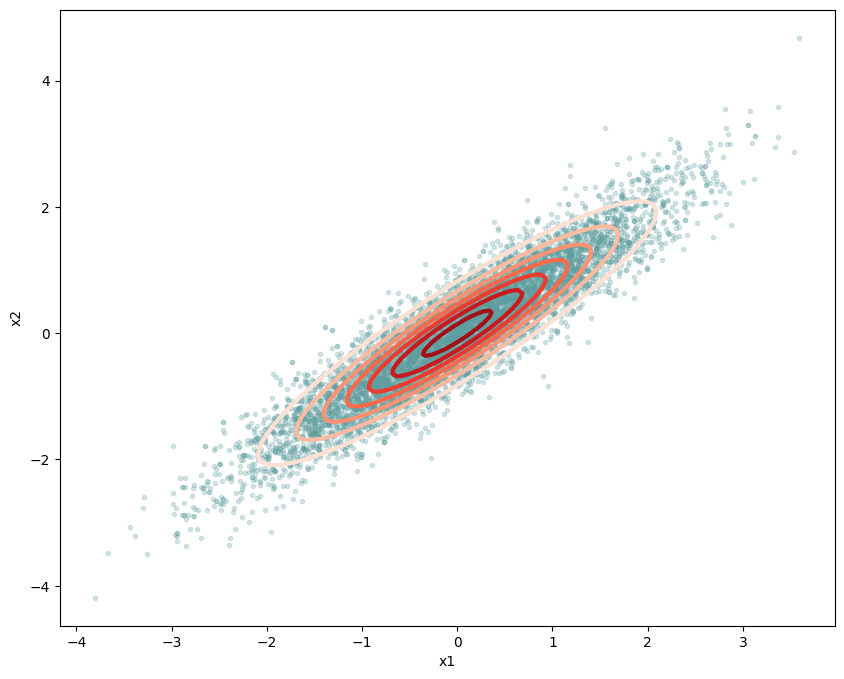

In [24]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####
R = 7000  
L = 20  
eps = 0.35  
burn = int(R / 10)

# R=
# L = 
# eps = 
# burn = 

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1)
plt.xlabel('x1')
plt.ylabel('x2')

In [25]:
np.mean(S, axis=0)

array([0.00890553, 0.01292767])

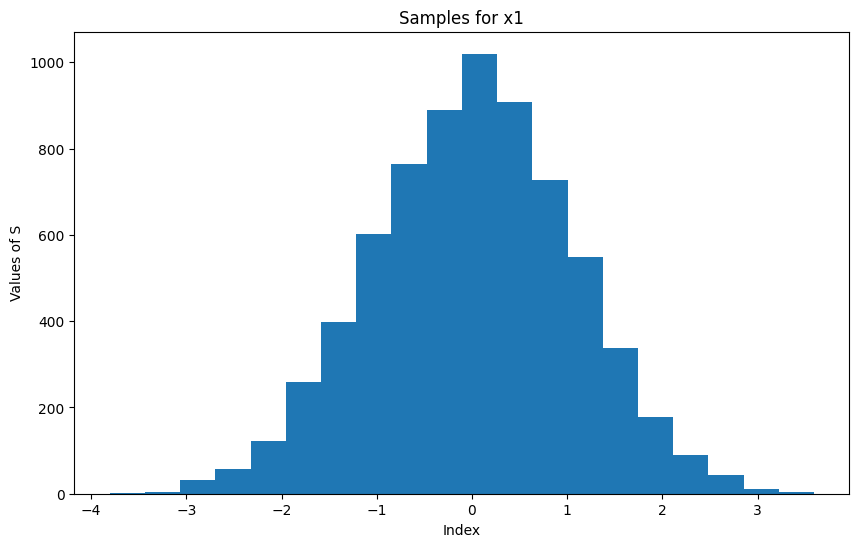

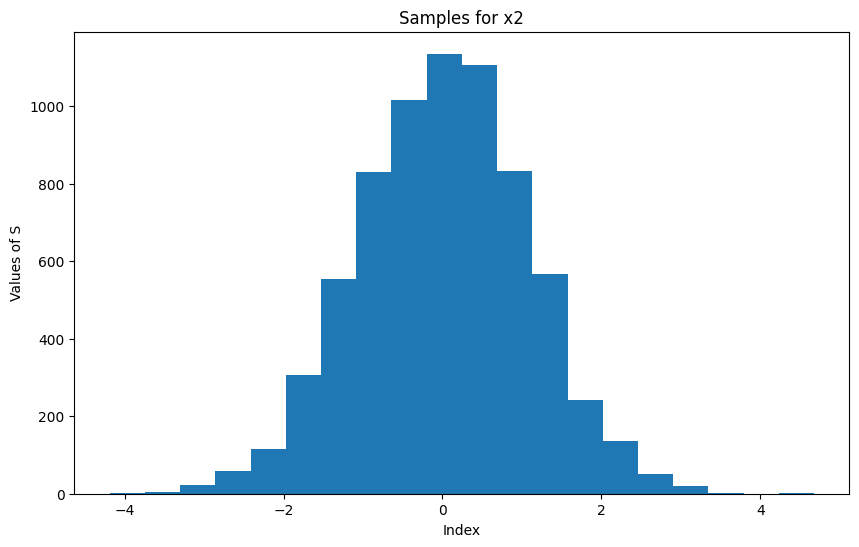

In [26]:
#### **** YOUR CODE HERE **** ####

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(S[:,0],bins=20)

plt.xlabel("Index")
plt.ylabel("Values of S")
plt.title("Samples for x1")
plt.show()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(S[:,1],bins=20)
plt.xlabel("Index")
plt.ylabel("Values of S")
plt.title("Samples for x2")
plt.show()
#### **** You can add extra figures to support the individual report **** ####



# Task 4: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(6 marks for coding part)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [27]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    n = len(y)

    alpha, beta, w = np.exp(hps[0]), np.exp(hps[1]), hps[2:]
    predictions = np.dot(x, w)

    m = len(w)
    
    errors = y - predictions

    ngl = 0.5 * n * (np.log(2 * np.pi) - np.log(beta)) + 0.5 * beta * np.sum(errors**2)
    
    ngp = 0.5 * m * (np.log(2 * np.pi) - np.log(alpha)) + 0.5 * alpha * np.sum(w**2)
    
    neglgp = ngl + ngp
    return neglgp

In [28]:
def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    n = len(y)
    
    
    alpha, beta, w = np.exp(hps[0]), np.exp(hps[1]), hps[2:]
    
    m = len(w)

    predictions = np.dot(x, w)

    errors = y - predictions

    # Gradient of neg_log_likelihood with respect to w
    grad_neg_log_likelihood = -beta * np.dot(errors, x)
    
    # Gradient of neg_log_prior with respect to w
    grad_neg_log_prior = alpha * w
    
    # Concatenating gradients
    grad_w = grad_neg_log_likelihood + grad_neg_log_prior

    grad_beta  = 0.5*(-n + beta*(np.sum(errors**2)))
    
    grad_alpha = 0.5*(-m + alpha*(np.sum(w**2)))

    g = np.concatenate(([grad_alpha], [grad_beta], grad_w))
    return g

In [29]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####
x0 = np.concatenate(([most_probable_alpha], [most_probable_beta], np.zeros(9)))
#x0 = np.random.normal(size=11) 
R = 10000
L = 25
eps = 0.012
burn = int(R/10)
checkgrad = True

Y_train = y_train
#### you can adjust the hpyer-parameters. 


S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, Y_train])

Calc.         Numeric       Delta         Acc.
        -4.5      -4.50001  -5.161390e-06   6
      133847        133847  -9.062293e-06  11
    -9808.96      -9808.96   1.311357e-05   9
    -2647.68      -2647.68   4.314940e-06   9
     2825.49       2825.49   3.991665e-06   9
    -1879.32      -1879.32   9.241950e-06   9
     3663.11       3663.11  -1.440736e-05   9
    -3797.67      -3797.67  -1.561150e-05   9
    -114.271      -114.271   3.244659e-06   8
    -1104.93      -1104.93  -6.733844e-06   9
    -282.083      -282.083  -2.481710e-06   9
|----------|  0% accepted [ 8 secs to go ]
|#---------| 42% accepted [ 7 secs to go ]
|##--------| 71% accepted [ 6 secs to go ]
|###-------| 80% accepted [ 5 secs to go ]
|####------| 85% accepted [ 4 secs to go ]
|#####-----| 88% accepted [ 4 secs to go ]
|######----| 90% accepted [ 3 secs to go ]
|#######---| 91% accepted [ 2 secs to go ]
|########--| 93% accepted [ 1 secs to go ]
|#########-| 93% accepted [ 1 secs to go ]
|##########| 94% 

## Print out the RMSE and plot figures for your report

In [30]:
#### **** YOUR CODE HERE **** ####
mean_params = np.mean(S, axis=0)

# Calculate the predicted values using the mean parameters
mean_predicted_values_train = np.dot(X_train, mean_params[2:])
mean_predicted_values_test = np.dot(X_test, mean_params[2:])

# Calculate RMSE
rmse_mean_train = np.sqrt(mean_squared_error(y_train, mean_predicted_values_train))
rmse_mean_test = np.sqrt(mean_squared_error(y_test, mean_predicted_values_test))
print("Mean RMSE Test:", rmse_mean_train)
print("Mean RMSE Test:", rmse_mean_test)

Mean RMSE Test: 3.358288394149561
Mean RMSE Test: 3.1515903817984885


In [31]:
print(f'final alpha = {np.exp(mean_params[0])}')
print(f'final beta = {np.exp(mean_params[1])}')



final alpha = 0.01431004938575126
final beta = 0.11765479807085186


In [32]:
S.shape

(10000, 11)

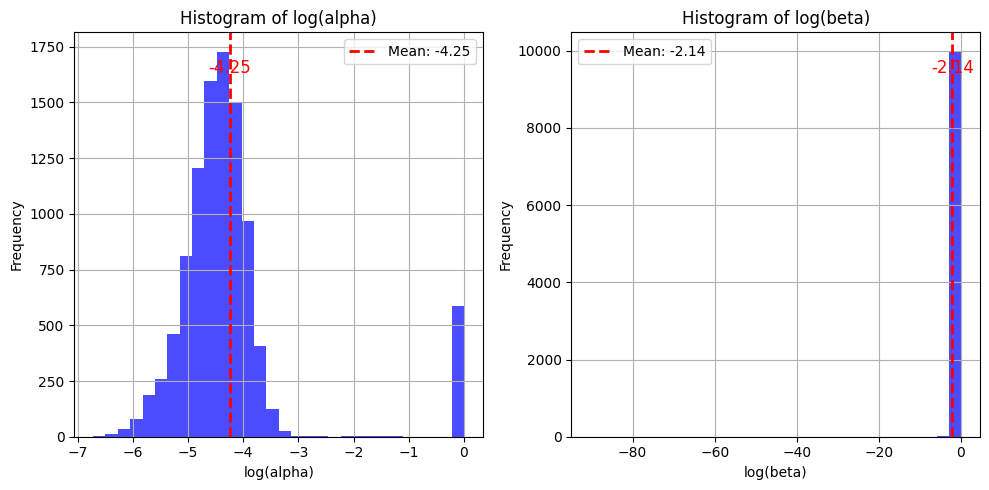

In [33]:
def plot_histogram_all(params_samples, param_names):
    num_params = params_samples.shape[1]  # Get the number of parameters
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed
    
    for i in range(num_params):
        plt.subplot(num_params//2 + num_params%2, 2, i+1)  # Create subplots
        plt.hist(params_samples[:, i], bins=30, color='blue', alpha=0.7)  # Plot histogram of parameter samples
        mean_value = np.mean(params_samples[:, i])  # Calculate mean value
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')  # Add mean line
        plt.text(mean_value, plt.ylim()[1]*0.9, f'{mean_value:.2f}', color='red', fontsize=12, ha='center')  # Add text label
        plt.xlabel(param_names[i])
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {param_names[i]}')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()  # Adjust layout
    plt.show()

# Assuming S is a 2D array where each row represents a sample and each column represents a parameter
# You can obtain separate samples for each parameter using indexing
param_names = ['log(alpha)', 'log(beta)']

# Plotting histograms for all parameters
plot_histogram_all(S[:,0:2], param_names)

# Task 5: Apply HMC as a Classifier (Section 4.5 in the specification doc)

###  **(5 marks for the coding part)**

There's no restriction on the classifier implementation, please follow the instricution/hints in the specification document. You may receive 1 extra bonus mark depending on the quality of implementation.  


    
    


In [34]:
y_classified = np.where(y_train>23,1,0)


def sigmoid(x):
    return 1/(1+np.exp(-x))


def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    
    n = len(y)

    alpha, w = np.exp(hps[0]), hps[1:]
    z = np.dot(x, w)
    predictions = sigmoid(z)

    m = len(w)

    ngl = -np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    ngp = 0.5 * m * (np.log(2 * np.pi) - np.log(alpha)) + 0.5 * alpha * np.sum(w**2)
    
    
    neglgp = ngl + ngp
    #neglgp = 0.5 *(errors**2) / n + np.log(n / (2 * np.pi * np.exp(alpha**2 + beta**2)))
    return neglgp

def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    n = len(y)
    alpha, w = np.exp(hps[0]), hps[1:]
    m = len(w)

    z = np.dot(x, w)
    predictions = sigmoid(z)

    errors = predictions - y
    grad_neg_log_likelihood = np.dot(errors, x)
    grad_neg_log_prior = alpha * w
    grad_w = grad_neg_log_likelihood + grad_neg_log_prior
    
    grad_alpha = (np.sum(w**2) / (2 * alpha) - m / (2 * alpha))*alpha

    g = np.concatenate(([grad_alpha], grad_w))

    return g


In [35]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####

x0 = np.concatenate(([most_probable_alpha], np.zeros(9)))
#x0 = np.random.normal(size=10)

R = 10000
L = 25
eps = 0.001
burn = int(R/10)
checkgrad = True

S, rejects = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_classified])

Calc.         Numeric       Delta         Acc.
        -4.5          -4.5   1.136141e-08   9
          -2            -2   5.049515e-09   9
     -146.86       -146.86   2.853221e-08  10
     153.219       153.219  -5.646427e-09  11
    -53.1448      -53.1448  -3.204677e-08  10
     175.673       175.673   1.865561e-08  10
    -180.334      -180.334   2.087830e-09  11
      -7.231        -7.231  -1.889050e-08   9
    -16.1591      -16.1591   7.637471e-09  10
    -11.4549      -11.4549   2.767755e-08   9
|----------|  0% accepted [ 9 secs to go ]
|#---------| 98% accepted [ 8 secs to go ]
|##--------| 98% accepted [ 7 secs to go ]
|###-------| 96% accepted [ 6 secs to go ]
|####------| 95% accepted [ 5 secs to go ]
|#####-----| 95% accepted [ 4 secs to go ]
|######----| 94% accepted [ 3 secs to go ]
|#######---| 93% accepted [ 3 secs to go ]
|########--| 92% accepted [ 2 secs to go ]
|#########-| 92% accepted [ 1 secs to go ]
|##########| 91% accepted [ 0 secs to go ]
HMC: R=10000 / L=25 

In [36]:

mean_params = np.mean(S, axis=0)

y_test_classified = np.where(y_test>23, 1, 0)

mean_predicted_values_train = np.dot(X_train, mean_params[1:])
mean_predicted_values_test = np.dot(X_test, mean_params[1:])

mean_predicted_values_train = np.where(sigmoid(mean_predicted_values_train)>0.5, 1,0)
mean_predicted_values_test = np.where(sigmoid(mean_predicted_values_test)>0.5, 1,0)

from sklearn.metrics import accuracy_score
print('Accuracy Train:  ',accuracy_score(mean_predicted_values_train,y_classified))
print('Accuracy Test:   ',accuracy_score(mean_predicted_values_test,y_test_classified))

Accuracy Train:   0.9765625
Accuracy Test:    0.984375


In [37]:
print(f'final alpha = {np.exp(mean_params[0])}')

final alpha = 0.3267185016135505


# Task 6: Variational Inference (Section 4.6 in the specification doc)

###  **(4 marks for coding part)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

<font color=Red> The corresponding derivations should be completed in your report.</font>



In [43]:
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####

    return an,bn,cn,dn, mn_n, sig_n


Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 

In [44]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####

# Print out the expectation of alpha and beta


Error output: name 'mn_n' is not defined


In [41]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [45]:
#### **** YOUR CODE HERE **** ####
